# Linear Model

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
filepath = "../../../data/processed/imputed_df.xlsx"
df = pd.read_excel(filepath)
df.head()

,year,island_id,population,dummy_after_bridge_opened,income
0,1995,0,15415.5,0,16109099.0
1,1995,1,2857.0,0,2443874.0
2,1995,2,4048.0,0,3451278.0
3,1995,3,802.0,0,535779.0
4,1995,4,4597.0,0,4017388.0


In [4]:
df['log_income'] = np.log(df['income'])

## PooledOLS

In [37]:
formual = 'population ~ dummy_after_bridge_opened + log_income'

model = smf.ols(formula=formual, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             population   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     50.57
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           1.45e-21
Time:                        13:03:19   Log-Likelihood:                -9123.5
No. Observations:                 924   AIC:                         1.825e+04
Df Residuals:                     921   BIC:                         1.827e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

## Two Way Fixed Effects

In [39]:
formula = 'population ~ dummy_after_bridge_opened + log_income + C(island_id) + C(year)'

model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             population   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     282.2
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:04:58   Log-Likelihood:                -7278.7
No. Observations:                 924   AIC:                         1.488e+04
Df Residuals:                     763   BIC:                         1.566e+04
Df Model:                         160                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

## 残差分析

In [40]:
residuals = results.resid

In [41]:
# 説明変数と残差の相関
corr_log_income = np.corrcoef(df['log_income'], residuals)[0, 1]
corr_bridge = np.corrcoef(df['dummy_after_bridge_opened'], residuals)[0, 1]
coor_population = np.corrcoef(df['population'], residuals)[0, 1]

print(f'coor between log_income and residuals: {corr_log_income:.3f}')
print(f'coor between bridge and residuals: {corr_bridge:.3f}')
print(f'coor between population and residuals: {coor_population:.3f}')

coor between log_income and residuals: 0.000
coor between bridge and residuals: 0.000
coor between population and residuals: 0.129


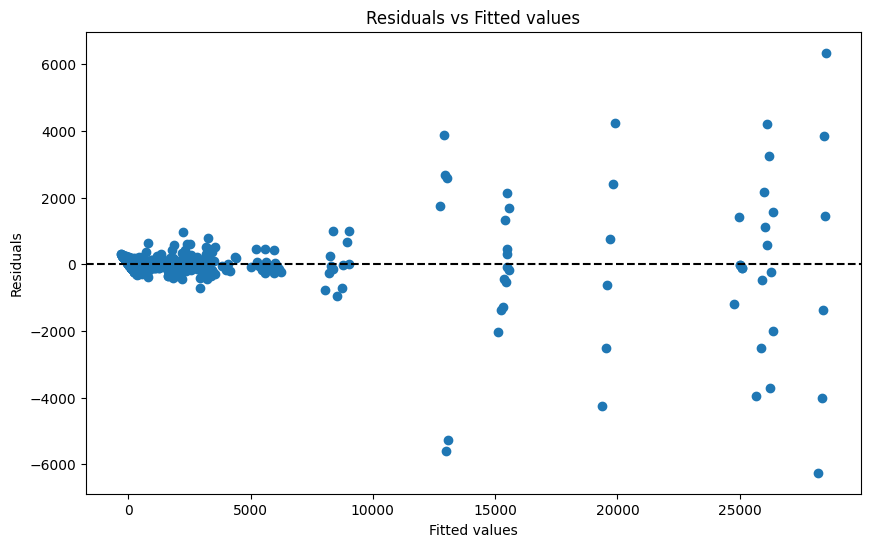

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(results.fittedvalues, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

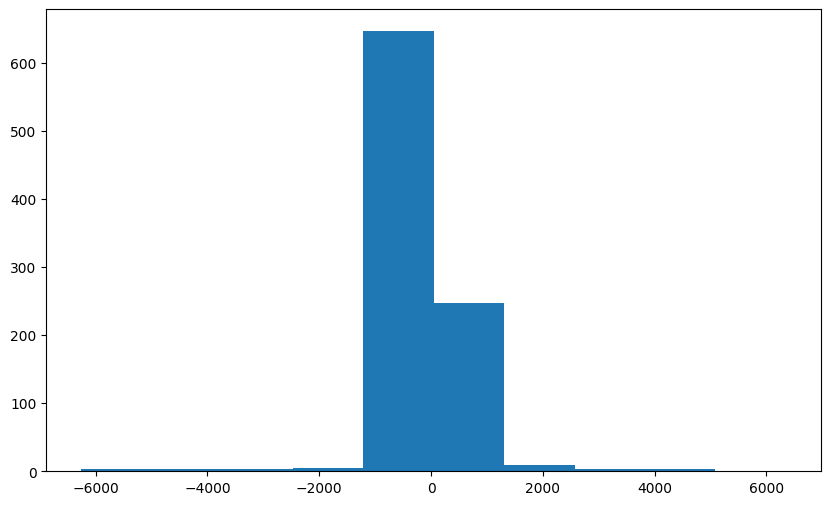

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(residuals)
plt.show()